# RNN

Test out vectorized RNN implementation

### Hyperparameters

In [9]:
NUM_HIDDEN = 5
NUM_CLASSES = 3
LEARNING_RATE = .1
REGULARIZER = .001

### Load Data

In [ ]:
from data.rnn import X_train, Y_train

X_train, Y_train

### Train

In [10]:
from rnn.model import RecurrentNeuralNetwork
from rnn.support import Snapshot

rnn = RecurrentNeuralNetwork(X_train, Y_train, H=NUM_HIDDEN, C=NUM_CLASSES, learning_rate=LEARNING_RATE, regularizer=REGULARIZER, gradient_checking=False, inspect=True)

def states(iters):
    for _ in range(iters):
        rnn.learn()
        yield rnn.info
        
states = list(states(100))

df = pd.DataFrame(states, columns=Snapshot._fields)

(array([[ 1,  1, -1,  1]]), array([0, 0, 2, 1]))

### Loss

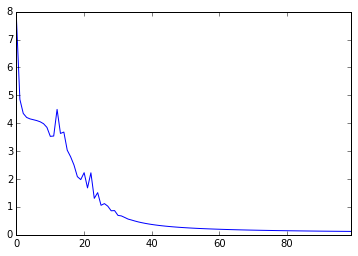

In [6]:
df.loss.plot()

### Plot Scores Over Time

[[ 1  1 -1  1]]
[0 0 2 1]


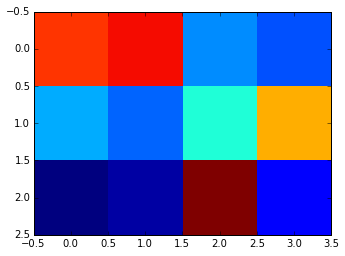

In [8]:
from ipywidgets import interact, fixed

N, T = X_train.shape

@interact(X_train=fixed(X_train), Y_train=fixed(Y_train), iter_index=(0, len(states)-1))
def plot(X_train, Y_train, iter_index):
    s = states[iter_index]
    
    rnn = RecurrentNeuralNetwork(X=X_train, ys_train=Y_train, H=5, C=3,
                                 Whh=s.Whh, bhh=s.bhh, Wxh=s.Wxh, bxh=s.bxh, Ws=s.Ws, bs=s.bs)
    
    scores, predictions = rnn.predict(X_train)
    
    print(X_train)
    print(Y_train)
    
    plt.imshow(scores, interpolation='nearest')